# Домашнее задание №1: ДЗ-1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import json

with open("gdrive/My Drive/HPC/top500.json") as json_file:
    json_data = json.load(json_file)
    print(json_data)

{'06/1993': {'Sum': [1100.0, 'GFlop/s'], '#1': [59.7, 'GFlop/s'], '#500': [0.4, 'GFlop/s']}, '11/1993': {'Sum': [1500.0, 'GFlop/s'], '#1': [124.0, 'GFlop/s'], '#500': [0.5, 'GFlop/s']}, '06/1994': {'Sum': [2300.0, 'GFlop/s'], '#1': [143.4, 'GFlop/s'], '#500': [0.8, 'GFlop/s']}, '11/1994': {'Sum': [2700.0, 'GFlop/s'], '#1': [170.0, 'GFlop/s'], '#500': [1.2, 'GFlop/s']}, '06/1995': {'Sum': [3900.0, 'GFlop/s'], '#1': [170.0, 'GFlop/s'], '#500': [2.0, 'GFlop/s']}, '11/1995': {'Sum': [4800.0, 'GFlop/s'], '#1': [170.0, 'GFlop/s'], '#500': [2.5, 'GFlop/s']}, '06/1996': {'Sum': [5900.0, 'GFlop/s'], '#1': [220.4, 'GFlop/s'], '#500': [3.3, 'GFlop/s']}, '11/1996': {'Sum': [8000.0, 'GFlop/s'], '#1': [368.2, 'GFlop/s'], '#500': [4.6, 'GFlop/s']}, '06/1997': {'Sum': [12800.0, 'GFlop/s'], '#1': [1100.0, 'GFlop/s'], '#500': [7.7, 'GFlop/s']}, '11/1997': {'Sum': [16900.0, 'GFlop/s'], '#1': [1300.0, 'GFlop/s'], '#500': [9.5, 'GFlop/s']}, '06/1998': {'Sum': [22600.0, 'GFlop/s'], '#1': [1300.0, 'GFlop/s']

In [ ]:
top_1 = []
top_500 = []
sum_top = []
date = []

for period, data in json_data.items():
  date.append(period)
  for n, GFlop in data.items():
    if n == "Sum":
      sum_top.append(GFlop[0])
    if n == "#1":
      top_1.append(GFlop[0])
    if n == "#500":
      top_500.append(GFlop[0])    

In [ ]:
d = {'date': date, 'top_1': top_1, 'top_500': top_500, 'sum_top': sum_top}
df = pd.DataFrame(data=d)
df[:3]

,date,top_1,top_500,sum_top
0,06/1993,59.7,0.4,1100.0
1,11/1993,124.0,0.5,1500.0
2,06/1994,143.4,0.8,2300.0


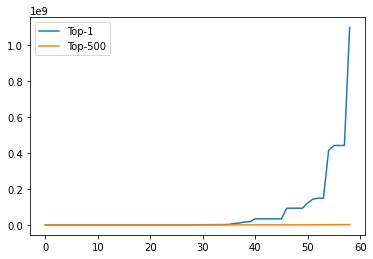

In [ ]:
plt.plot([i for i in range(59)], df['top_1'].values, label='Top-1')
plt.plot([i for i in range(59)], df['top_500'].values, label='Top-500')
plt.legend()
plt.show()

### На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025

In [ ]:
#top_1_1
# график производительность компьютера №1 похож на экспоненту

top_1_log = np.log(df['top_1'].values)
xs = np.arange(59).reshape(-1, 1)
xs_t = np.arange(0, 67).reshape(-1, 1)
reg = LinearRegression().fit(xs, top_1_log)
print(reg.score(xs, top_1_log))
print(reg.coef_)
print(reg.intercept_)

0.9873448010515966
[0.29242103]
4.413132225175504


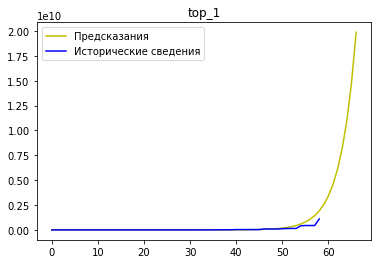

In [ ]:
#top_1
#59 06/2022

#60 11/2022 #61 06/2023 #62 11/2023 #63 06/2024 #64 11/2024 #65 06/2025 #66 11/2025
plt.plot(np.arange(0, 67).reshape(-1, 1), np.exp(reg.predict(xs_t)), 'y', label='Предсказания')
plt.plot(np.arange(0, 59).reshape(-1, 1), df['top_1'].values, 'b', label= 'Исторические сведения')
plt.title('top_1')
plt.legend()
plt.show()

In [ ]:
#На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025
top_1_06_2025 = np.exp(reg.predict([[65]]))
top_1_11_2025 = np.exp(reg.predict([[66]]))
print('Спрогнозировать  производительность компьютера №1 в 2025 06_2025', top_1_06_2025, 'GFlop/s')
print('Спрогнозировать  производительность компьютера №1 в 2025 11_2025', top_1_11_2025, 'GFlop/s')

Спрогнозировать  производительность компьютера №1 в 2025 06_2025 [1.48386245e+10] GFlop/s
Спрогнозировать  производительность компьютера №1 в 2025 11_2025 [1.98788147e+10] GFlop/s


### Оцените какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)

In [ ]:
data_top500 = pd.read_excel('gdrive/My Drive/HPC/TOP500_202206.xlsx')

In [ ]:
# в top500 не везде указана Power (kW), поэтому найдем среднее у имеющихся и умножим на 500
sum_power_500 = data_top500['Power (kW)'].mean() * 500

sum_power_500

891325.7853403141

In [ ]:
# потребление в мире в kW
world = 26_823_200 * 1_000_000 / 365 / 24

In [ ]:
#процент всего производимого на Земле электричества потребляют все компьютеры top500

procent = sum_power_500 * 100 / world
print('Процент всего производимого на Земле электричества потребляют все компьютеры top500:', procent)

Процент всего производимого на Земле электричества потребляют все компьютеры top500: 0.02910918115504918
